<a href="https://colab.research.google.com/github/solanovisitor/humor-predict/blob/master/PROMIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando bibliotecas e o arquivo de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

filename = 'RecenterCompletes.tab'
dados = pd.read_csv(filename, sep='\t')
dados.head()

,RID,Q1,Qsocio02,Qsocio03,Qsocio04,Qsocio04Other,QSOCI0,QSOCI1,QSOCI2,Qsocio05_1,Qsocio05_2,Qsocio05_3,Qsocio05_4,Qsocio05_5,Qsocio05_6,Qsocio07,Qsocio01a,QSD4,QSD4Other,Qsocio06,Qsocio17,Qsocio19,Qsocio20,Qclinic01a_1,Qclinic01a_2,Qclinic01a_3,Qclinic01a_4,Qclinic01a_5,Qclinic01a_6,Qclinic01a_7,Qclinic01a_8,Qclinic01a_9,Qclinic01a_10,Qclinic01a_11,Qclinic01a_12,Qclinic01a_13,Qclinic01a_14,Qclinic01a_15,Qclinic01a_16,Qclinic01a_17,...,QPC8r,QPC25r,QPC35r,QPC39r,QPC48r,QPC51r,QPCCaPS25r,QPCCaPS12,QPC6,QPCCaPS3,QPC472,QPC432,QPC452,QPC442,QPCCaPS22,QHUI1,QHUI2,QHUI3,QHUI4,QHUI5,QHUI6,QHUI7,QHUI8,QHUI9,QHUI10,QHUI11,QHUI12,QHUI13,QHUI14,QHUI15,QHUI16,QHUI17,QHUI17Other2,QHUI1B,QHUI1C,QHUI1D,QHUI17Other1,QHUI18,QHUI19,QHUI1A
0,12948,1,5655,2,0,,,,,1,0,0,0,0,0,7,3,1,,2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,4,4,5,5,4,4,1,4,4,4,4,3.0,4,3,3,4.0,5.0,5,4,4,5,4,6,6.0,4,4,4,5,4.0,4,6,,,,,,,,
1,8727,1,88,2,0,,,,,1,0,0,0,0,0,8,3,1,,6,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,5,5,5,5,4,5,5,5,5,4,4.0,4,4,3,3.0,4.0,4,4,4,4,5,6,6.0,4,5,4,5,5.0,5,6,,,,,,,,
2,23455,1,88,2,0,,,,,1,0,0,0,0,0,7,1,1,,6,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,5,5,5,5,5,5,4,4,5,4,3.0,5,4,3,3.0,4.0,4,3,4,5,4,6,6.0,4,5,4,5,4.0,4,6,,,,,,,,
3,20450,1,87,1,0,,,,,1,0,0,0,0,0,9,3,1,,6,0,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,3,2,2,2,2,3,3,3,3,1,1,3.0,1,4,2,3.0,4.0,4,3,3,4,5,5,5.0,2,4,4,5,5.0,4,5,,,,,,,,
4,22813,1,86,2,0,,,,,1,0,0,0,0,0,6,1,1,,3,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,4,3,4,4,2,4,4,2,2,2,2,2,2.0,2,2,3,3.0,5.0,5,3,3,2,5,6,6.0,3,4,4,2,5.0,3,6,,,,,,,,


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt
import pickle

In [ ]:
# informações básicas da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 219 entries, RID to QHUI1A
dtypes: float64(61), int64(145), object(13)
memory usage: 5.0+ MB


In [ ]:
#análise descritiva inicial dos dados
dados.describe()

,RID,Q1,Qsocio02,Qsocio03,Qsocio04,Qsocio05_1,Qsocio05_2,Qsocio05_3,Qsocio05_4,Qsocio05_5,Qsocio05_6,Qsocio07,Qsocio01a,QSD4,Qsocio06,Qsocio17,Qsocio19,Qsocio20,Qclinic01a_1,Qclinic01a_2,Qclinic01a_3,Qclinic01a_4,Qclinic01a_5,Qclinic01a_6,Qclinic01a_7,Qclinic01a_8,Qclinic01a_9,Qclinic01a_10,Qclinic01a_11,Qclinic01a_12,Qclinic01a_13,Qclinic01a_14,Qclinic01a_15,Qclinic01a_16,Qclinic01a_17,Qclinic01a_18,Qclinic01a_19,Qclinic01a_20,Qclinic01a_21,Qclinic01a_22,...,QSRPPER14r1,QSRPPER15CaPS,QSRPPER18CaPS,QSRPPER23CaPS,QSRPPER26CaPS,QSRPPER28r1,QSRPPER46CaPS,QPC1r,QPC8r,QPC25r,QPC35r,QPC39r,QPC48r,QPC51r,QPCCaPS25r,QPCCaPS12,QPC6,QPCCaPS3,QPC472,QPC432,QPC452,QPC442,QPCCaPS22,QHUI1,QHUI2,QHUI3,QHUI4,QHUI5,QHUI6,QHUI7,QHUI8,QHUI9,QHUI10,QHUI11,QHUI12,QHUI13,QHUI14,QHUI15,QHUI16,QHUI17
count,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,3000.000000,3000.000000,2999.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,3000.000000,3000.000000,3000.000000,2998.000000,2999.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,3000.000000,3000.000000,3000.000000,3000.000000,2999.000000,3000.000000,3000.000000
mean,19370.482667,1.0,47.926333,1.514000,0.368667,0.712000,0.338667,0.393333,0.098667,0.138667,0.565333,6.740333,2.659000,1.139000,2.201000,0.901333,0.849667,3.593333,0.341447,0.098033,0.044348,0.037012,0.046682,0.028676,0.034678,0.033344,0.200734,0.159720,0.165722,0.054018,0.107036,0.046349,0.244081,0.214071,0.050684,0.134045,0.014338,0.027342,0.022341,0.250417,...,3.635667,3.519333,3.571524,3.528667,3.521000,3.576333,3.519000,4.219333,3.995333,3.912333,3.885000,3.838667,3.834333,3.691333,3.691333,3.006333,3.379333,3.399333,3.352667,3.331667,3.329777,3.360000,3.350000,3.197333,3.274183,4.475492,4.58400,3.629000,3.683333,4.026333,3.797333,5.338000,5.454485,3.417667,4.377000,3.584333,4.151333,3.923975,3.401000,5.647667
std,7025.498320,0.0,103.916151,0.499887,1.263045,0.452907,0.750217,1.191258,0.883096,1.483298,4.216277,1.254896,1.024566,0.641729,1.298908,1.344198,2.732927,6.808334,0.474274,0.297408,0.205902,0.188823,0.210993,0.166923,0.182994,0.179564,0.400616,0.366407,0.371893,0.226091,0.309210,0.210274,0.429613,0.410245,0.219387,0.340757,0.118900,0.163106,0.147814,0.433325,...,1.235086,1.258367,1.234160,1.237075,1.225585,1.244464,1.243176,1.087637,1.136548,1.142986,1.171423,1.166658,1.144840,1.157226,1.234193,1.544157,1.308438,1.327826,1.305959,1.330760,1.339208,1.339278,1.275164,0.713136,0.709491,0.971912,0.87666,0.703461,0.650536,1.003980,1.055129,1.019854,1.000923,0.832738,0.916779,0.768820,0.974721,1.021560,1.106318,0.773128
min,24.000000,1.0,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,17677.750000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.

In [ ]:
# análise exploratória dos dados, procurando por dados faltantes
aux = pd.DataFrame({'colunas': dados.columns, 'tipo': dados.dtypes, 'missing': dados.isna().sum(), 'size': dados.shape[0], 'unicos': dados.nunique()})
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux

,colunas,tipo,missing,size,unicos,percentual
RID,RID,int64,0,3000,3000,0.00
Q1,Q1,int64,0,3000,1,0.00
Qsocio02,Qsocio02,int64,0,3000,72,0.00
Qsocio03,Qsocio03,int64,0,3000,2,0.00
Qsocio04,Qsocio04,int64,0,3000,5,0.00
Qsocio04Other,Qsocio04Other,object,0,3000,49,0.00
QSOCI0,QSOCI0,object,0,3000,1,0.00
QSOCI1,QSOCI1,object,0,3000,1,0.00
QSOCI2,QSOCI2,object,0,3000,1,0.00
Qsocio05_1,Qsocio05_1,int64,0,3000,2,0.00


In [ ]:
# Explorando quais valores são únicos (sempre iguais)
aux[aux['unicos'] == 1].index

Index(['Q1', 'QSOCI0', 'QSOCI1', 'QSOCI2', 'QHUI17Other2', 'QHUI1B', 'QHUI1C',
       'QHUI1D', 'QHUI17Other1', 'QHUI18', 'QHUI19', 'QHUI1A'],
      dtype='object')

In [ ]:
# Deletando variáveis únicas
col_unicas = aux[aux['unicos'] == 1].index
dados.drop(col_unicas, 1, inplace=True)

In [ ]:
# Checando se nenhum paciente está duplicado
dados.duplicated().sum()

0

In [ ]:
# Instalando biblioteca para valores faltantes
!pip install missingno

In [ ]:
# Checando colunas com muitos dados faltantes.
# Pelo manual, são colunas não muito importantes.
aux[aux['missing'] > 200].index

Index(['Qclinic02a1', 'Qclinic02a2', 'Qclinic02a3', 'Qclinic02a4',
       'Qclinic02a5', 'Qclinic02a6', 'Qclinic02a7', 'Qclinic02a8',
       'Qclinic02a9', 'Qclinic02a10', 'Qclinic02a11', 'Qclinic02a12',
       'Qclinic02a13', 'Qclinic02a14', 'Qclinic02a15', 'Qclinic02a16',
       'Qclinic02a17', 'Qclinic02a18', 'Qclinic02a19', 'Qclinic02a20',
       'Qclinic02a21'],
      dtype='object')

In [ ]:
# Explorando respostas booleans
# 0.0 == sem hipertensão
# 1.0 == hipertensos
dados['Qclinic01a_1'].value_counts()

0.0    1975
1.0    1024
Name: Qclinic01a_1, dtype: int64

In [ ]:
# Deletando colunas com dados faltantes
dados.drop(['Qclinic02a1', 'Qclinic02a2', 'Qclinic02a3', 'Qclinic02a4',
       'Qclinic02a5', 'Qclinic02a6', 'Qclinic02a7', 'Qclinic02a8',
       'Qclinic02a9', 'Qclinic02a10', 'Qclinic02a11', 'Qclinic02a12',
       'Qclinic02a13', 'Qclinic02a14', 'Qclinic02a15', 'Qclinic02a16',
       'Qclinic02a17', 'Qclinic02a18', 'Qclinic02a19', 'Qclinic02a20',
       'Qclinic02a21'], 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


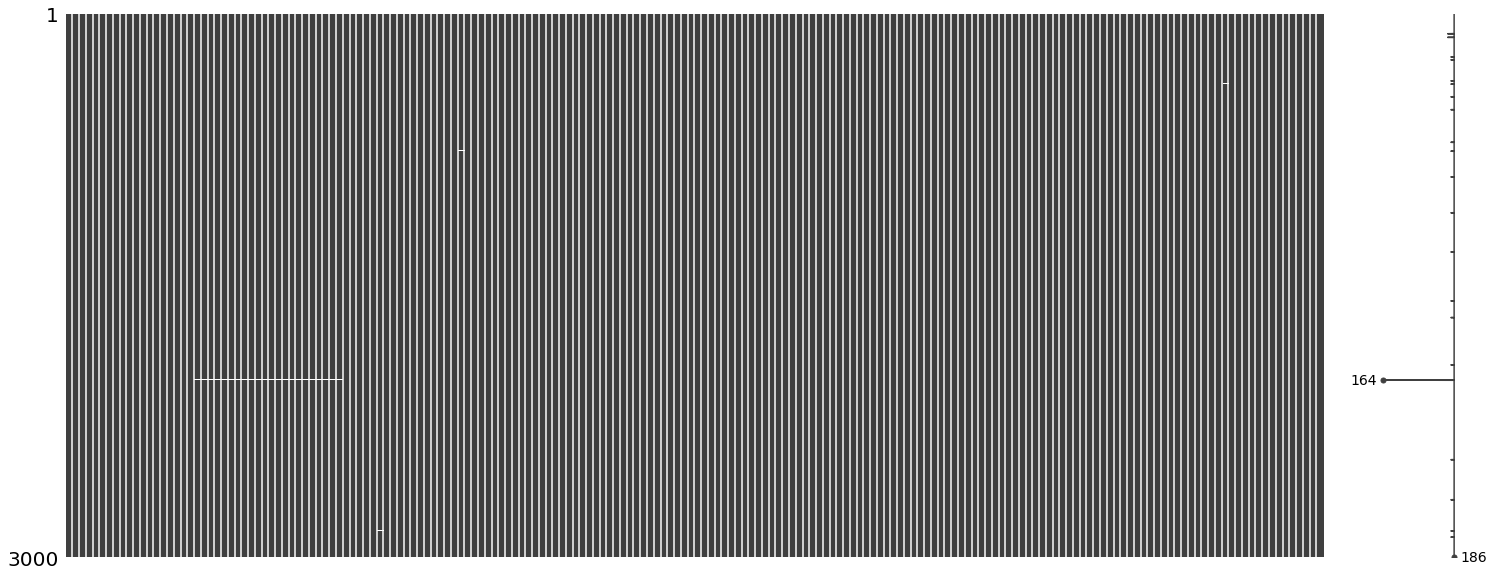

In [ ]:
# Checando matriz faltantes
import missingno as msno
msno.matrix(dados)

In [ ]:
# Dropando o identificador do respondente
dados.drop(['RID'], 1, inplace=True)

In [ ]:
# Explorando uma das variáveis analisadas (pergunta sobre ansiedade do promis)
dados.QEDANX01.value_counts()


1    1143
2     821
3     632
4     289
5     115
Name: QEDANX01, dtype: int64

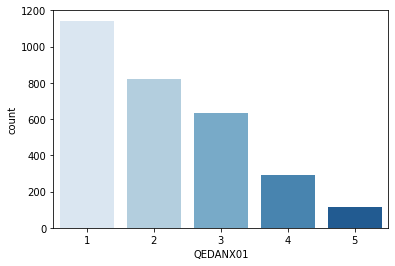

In [ ]:
# Plotando as repostas a essa pergunta
import seaborn as sns
sns.countplot(dados.QEDANX01, palette = 'Blues')

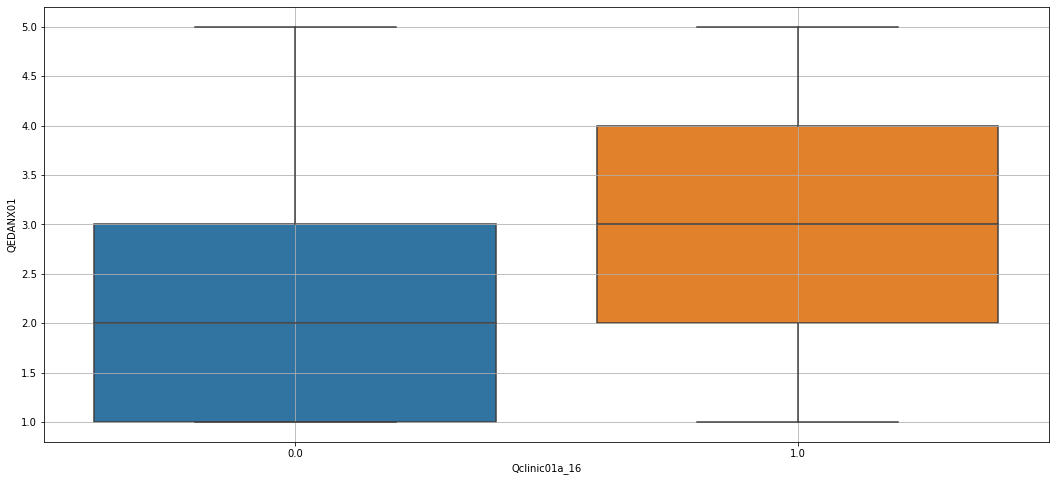

In [ ]:
# Plotando respostas em relação ao diagnóstico de ansiedade
# Observa-se uma maior pontuação na resposta de quem assinalou 'ansiedade'
plt.figure(figsize = (18,8))
sns.boxplot(data = dados, x = 'Qclinic01a_16', y = 'QEDANX01')
plt.grid()

In [ ]:
# Excluindo pacientes com dados nulos
novoset = pd.DataFrame.dropna(dados, 0)

In [ ]:
# Somar valores de comorbidades para cada paciente
valores = novoset[['Qclinic01a_1', 'Qclinic01a_2', 'Qclinic01a_3', 'Qclinic01a_4', 'Qclinic01a_5', 'Qclinic01a_6', 'Qclinic01a_7', 'Qclinic01a_8', 'Qclinic01a_9', 'Qclinic01a_10', 'Qclinic01a_11', 'Qclinic01a_12', 'Qclinic01a_13', 'Qclinic01a_14', 'Qclinic01a_15', 'Qclinic01a_16', 'Qclinic01a_17', 'Qclinic01a_18', 'Qclinic01a_19', 'Qclinic01a_20', 'Qclinic01a_21']]
# Hipertensão, angina, DAC, IC, IAM, hepatite/cirrose, DRC, artrite/reumatismo, enxaqueca, asma, DPOC/asma, DM, cancer, depressão, ansiedade, alcoolismo, insônia, HIV/AIDS, lesado medular, EM, s/ comorbidades) 
soma = valores.sum(axis=1)
soma

0       1.0
1       1.0
2       2.0
3       1.0
4       3.0
       ... 
2995    1.0
2996    0.0
2997    1.0
2998    4.0
2999    0.0
Length: 2979, dtype: float64

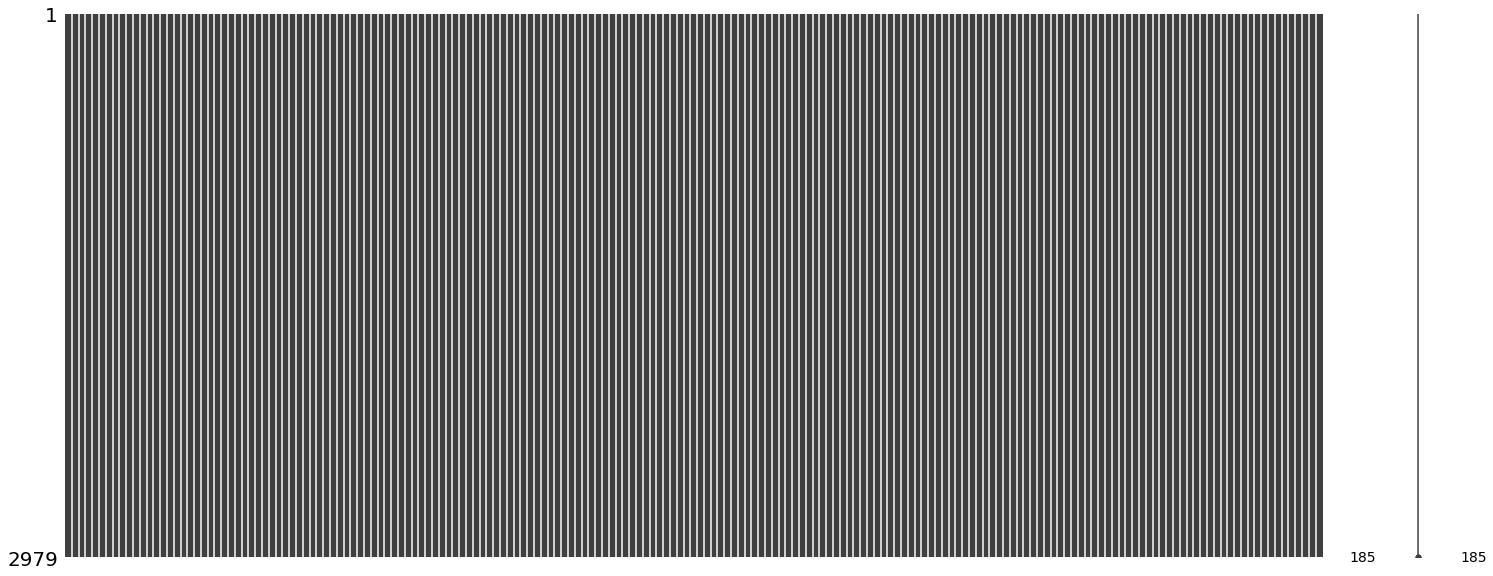

In [ ]:
# Plotando nova matriz completa
msno.matrix(novoset)

In [ ]:
# Iniciando classificação, importando ppscore
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12986 sha256=2050b267dd8407fbfe7b859e3680665af7bc8c1e798a7fba9558555d4538f04a
  Stored in directory: /root/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore


In [ ]:
# score de ansiedade somado
ans = novoset[['QEDANX01', 'QEDANX30', 'QEDANX40', 'QEDANX53']]
ans_tot = ans.sum(axis=1)
ans_tot


0        7
1        4
2        4
3       10
4       17
        ..
2995    10
2996     5
2997    11
2998    20
2999    12
Length: 2979, dtype: int64

In [ ]:
# score de depressão somado
dep = novoset[['QEDDEP04', 'QEDDEP06', 'QEDDEP29', 'QEDDEP41']]
dep_tot = dep.sum(axis=1)
dep_tot

0        6
1        4
2        4
3       11
4       18
        ..
2995    11
2996     6
2997    12
2998    20
2999     7
Length: 2979, dtype: int64

In [ ]:
# score de casaço somado
fat = novoset[['QAN3', 'QHI7', 'QFATEXP35', 'QFATEXP41']]
fat_tot =fat.sum(axis=1)
fat_tot

0        9
1        4
2        7
3       12
4        9
        ..
2995     8
2996     4
2997    12
2998    19
2999     6
Length: 2979, dtype: int64

In [ ]:
# score de saúde física somado
atv = novoset[['QPFA53', 'QPFA11', 'QPFA23', 'QPFA21']]
atv_tot = atv.sum(axis=1)
atv_tot

0       19
1       20
2       16
3       10
4       20
        ..
2995    16
2996    20
2997    16
2998    13
2999    20
Length: 2979, dtype: int64

In [ ]:
 # score de dor somado
pain = novoset[['QPAININ10', 'QPAININ31', 'QPAININ34', 'QPAININ22']]
pain_tot = pain.sum(axis=1)
pain_tot

0        8
1        4
2       12
3       11
4        4
        ..
2995    11
2996     8
2997     9
2998    16
2999     4
Length: 2979, dtype: int64

In [ ]:
 # score de sono somado
slp = novoset[['QSleep109', 'QSleep44', 'QSleep20', 'QSleep116']]
slp_tot = slp.sum(axis=1)
slp_tot

0       12.0
1       12.0
2       15.0
3       11.0
4        8.0
        ... 
2995    11.0
2996     7.0
2997    13.0
2998    15.0
2999     8.0
Length: 2979, dtype: float64

In [ ]:
 # score de social somado
soc = novoset[['QSRPPER18CaPS', 'QSRPPER46CaPS', 'QSRPPER11CaPS', 'QSRPPER23CaPS']]
soc_tot = soc.sum(axis=1)
soc_tot


0       16.0
1       20.0
2       15.0
3       14.0
4       16.0
        ... 
2995    15.0
2996    16.0
2997    12.0
2998     5.0
2999    16.0
Length: 2979, dtype: float64

In [ ]:
novoset.describe()

,Qsocio02,Qsocio03,Qsocio04,Qsocio05_1,Qsocio05_2,Qsocio05_3,Qsocio05_4,Qsocio05_5,Qsocio05_6,Qsocio07,Qsocio01a,QSD4,Qsocio06,Qsocio17,Qsocio19,Qsocio20,Qclinic01a_1,Qclinic01a_2,Qclinic01a_3,Qclinic01a_4,Qclinic01a_5,Qclinic01a_6,Qclinic01a_7,Qclinic01a_8,Qclinic01a_9,Qclinic01a_10,Qclinic01a_11,Qclinic01a_12,Qclinic01a_13,Qclinic01a_14,Qclinic01a_15,Qclinic01a_16,Qclinic01a_17,Qclinic01a_18,Qclinic01a_19,Qclinic01a_20,Qclinic01a_21,Qclinic01a_22,QGlobal01,QGlobal02,...,QSRPPER14r1,QSRPPER15CaPS,QSRPPER18CaPS,QSRPPER23CaPS,QSRPPER26CaPS,QSRPPER28r1,QSRPPER46CaPS,QPC1r,QPC8r,QPC25r,QPC35r,QPC39r,QPC48r,QPC51r,QPCCaPS25r,QPCCaPS12,QPC6,QPCCaPS3,QPC472,QPC432,QPC452,QPC442,QPCCaPS22,QHUI1,QHUI2,QHUI3,QHUI4,QHUI5,QHUI6,QHUI7,QHUI8,QHUI9,QHUI10,QHUI11,QHUI12,QHUI13,QHUI14,QHUI15,QHUI16,QHUI17
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,...,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000
mean,47.896945,1.514267,0.369587,0.710641,0.339711,0.396106,0.099362,0.139644,0.569319,6.739846,2.661967,1.139644,2.197717,0.898288,0.851964,3.601208,0.340047,0.097684,0.044310,0.036925,0.046996,0.028869,0.034911,0.033233,0.200403,0.160121,0.166835,0.054045,0.106747,0.045653,0.244377,0.214166,0.051024,0.134609,0.014434,0.027190,0.022155,0.251091,3.223565,3.239006,...,3.634105,3.519302,3.571668,3.528365,3.522323,3.575697,3.518966,4.220544,3.994293,3.912051,3.884525,3.837865,3.832158,3.690500,3.691172,3.006378,3.378315,3.401141,3.353474,3.330648,3.328969,3.360859,3.348439,3.199060,3.274589,4.475999,4.584424,3.628063,3.682779,4.025176,3.796912,5.337362,5.454179,3.417925,4.376301,3.585096,4.150050,3.920779,3.400806,5.647533
std,104.269365,0.499880,1.266673,0.453541,0.751138,1.194991,0.886165,1.488472,4.230849,1.256465,1.023334,0.643693,1.295047,1.335593,2.741475,6.810597,0.473804,0.296936,0.205818,0.188610,0.211665,0.167466,0.183585,0.179274,0.400369,0.366780,0.372891,0.226144,0.308843,0.208766,0.429790,0.410311,0.220083,0.341363,0.119293,0.162665,0.147212,0.433714,1.069308,1.059326,...,1.237045,1.259702,1.235996,1.237476,1.226973,1.246039,1.244421,1.087215,1.137153,1.143639,1.171677,1.168004,1.145857,1.157311,1.234423,1.544600,1.308986,1.327454,1.305924,1.331707,1.340039,1.339972,1.275949,0.712773,0.708622,0.970871,0.876435,0.704465,0.651296,1.004876,1.054927,1.020928,1.002431,0.833460,0.917549,0.768149,0.975166,1.023122,1.107311,0.773102
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,31.000000,1.000000,0.000000,0.000000

In [ ]:
novoset['comorbidade'] = 0
novoset.loc[novoset['Qclinic01a_22'] == 0, 'comorbidade'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
novoset['comorbidade'].value_counts(dropna=False)

1    2231
0     748
Name: comorbidade, dtype: int64

In [ ]:
men_tot = dep_tot + ans_tot
men_tot

0       13
1        8
2        8
3       21
4       35
        ..
2995    21
2996    11
2997    23
2998    40
2999    19
Length: 2979, dtype: int64

In [ ]:
men_totdf=pd.DataFrame(men_tot)
men_totdf

,0
0,13
1,8
2,8
3,21
4,35
...,...
2995,21
2996,11
2997,23
2998,40


## **Aqui começa o modelo de depressão**

In [ ]:
# Criando x e y para classificação. No X a pontuação de cada pergunta.
X = novoset[['QEDDEP04', 'QEDDEP06', 'QEDDEP29', 'QEDDEP41', 'QEDANX01', 'QEDANX30', 'QEDANX40', 'QEDANX53']]
y = novoset['Qclinic01a_15']


In [ ]:
# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.33, random_state = 42)

regressão logística

In [ ]:
#Iniciando predição em modelo de regressão logísitca

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xval)

In [ ]:
# MODELO de regressão logística - Resultado
from sklearn.metrics import classification_report as cr
print(cr(yval, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       751
         1.0       0.65      0.34      0.45       233

    accuracy                           0.80       984
   macro avg       0.73      0.64      0.66       984
weighted avg       0.78      0.80      0.78       984



In [ ]:
# MODELO de regressão logística
pred_lr = lr.predict(Xval)
pred_lr[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Probabilidades da LR
prob_lr = lr.predict_proba(Xval)
prob_lr[:10]

array([[0.91848791, 0.08151209],
       [0.93269461, 0.06730539],
       [0.75348787, 0.24651213],
       [0.93269461, 0.06730539],
       [0.68811059, 0.31188941],
       [0.51276816, 0.48723184],
       [0.70159083, 0.29840917],
       [0.92622765, 0.07377235],
       [0.800028  , 0.199972  ],
       [0.7907663 , 0.2092337 ]])

random forest classifier

In [ ]:
# Iniciando modelo random forest classifier
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# MODELO random forest classifier - Resultado
pred_rf = modelo.predict(Xval)
print(cr(yval, pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       751
         1.0       0.50      0.32      0.39       233

    accuracy                           0.76       984
   macro avg       0.66      0.61      0.62       984
weighted avg       0.74      0.76      0.74       984



In [ ]:
# Probabilidades do RFC
prob_rf = modelo.predict_proba(Xval)
prob_rf[:10]

array([[0.94084849, 0.05915151],
       [0.96048652, 0.03951348],
       [0.77      , 0.23      ],
       [0.96048652, 0.03951348],
       [0.86791667, 0.13208333],
       [0.14467605, 0.85532395],
       [0.64666667, 0.35333333],
       [1.        , 0.        ],
       [0.7625    , 0.2375    ],
       [0.97      , 0.03      ]])

XGBoost

In [ ]:
# definindo report
def report(yval, pred):
  print(f'MAE: {mae(yval, pred)}')
  print(f'MSE: {mse(yval, pred)}')
  print(f'RMSE: {np.sqrt(mse(yval, pred))}')
  print(f'R2: {r2(yval,pred)}')

In [ ]:
# Hiperparametrização com XGBOOST
param_grid = {
'silent': [False],
'max_depth': [6, 10, 15, 20],
'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
'gamma': [0, 0.25, 0.5, 1.0],
'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
'n_estimators': [100]}
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model,n_iter=100,verbose=2, param_distributions=param_grid, random_state=0, cv=5)
search = random_search.fit(X, y)
xgb = search.best_estimator_
xgb.fit(Xtrain,ytrain)
pred_xgb = xgb.predict(Xval)


In [ ]:
# fit model no training data XGBoost - com melhores parâmetros
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=100.0, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.6, verbosity=1)
model.fit(Xtrain, ytrain)

In [ ]:
# Probabilidades do XGB
prob_xgb = xgb.predict_proba(Xval)
prob[:10]

In [ ]:
# Reportando XGBoost
from sklearn.metrics import classification_report
print(classification_report(yval, pred_xgb))

SVM

In [ ]:
# SVM
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(Xtrain, ytrain)


In [ ]:
# Predição dos 10 primeiros resultados

pred_svm = svc.predict(Xval)
pred_svm[:10]

In [ ]:
# Probabilidade do SVM

prob_svm = svc.predict_proba(Xval)
prob_svm[:20]

In [ ]:
# Matriz
# TP FP
# FN TN
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, pred)

Curvas ROC dos modelos

In [ ]:
import scikitplot as skplt

In [ ]:
# Regressão Logística - ROC - AUC 79
skplt.metrics.plot_roc_curve(yval, prob_lr, figsize=(8,8), curves='each_class')

In [ ]:
# Random Forest - ROC - AUC 72
skplt.metrics.plot_roc_curve(yval, prob_rf, figsize=(8,8), curves='each_class')

In [ ]:
# XGB - ROC - AUC 79
skplt.metrics.plot_roc_curve(yval, prob_xgb, figsize=(8,8), curves='each_class')

In [ ]:
# SVM - ROC - AUC 66
skplt.metrics.plot_roc_curve(yval, prob_svm, figsize=(8,8), curves='each_class')

Aqui farei o load com pickle

In [ ]:
# Save the trained model as a pickle string. 
pickle.dump(lr, open('modelo-lr.sav', 'wb'))

## **Daqui para baixo é ansiedaede**

In [ ]:
# Criando x e y para classificação. No X a pontuação de cada pergunta.
X = novoset[['QEDDEP04', 'QEDDEP06', 'QEDDEP29', 'QEDDEP41', 'QEDANX01', 'QEDANX30', 'QEDANX40', 'QEDANX53']] 
y = novoset['Qclinic01a_16']

In [ ]:
# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
Xtrain, Xval, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 42)

regressão logística

In [ ]:
#Iniciando predição em modelo de regressão logísitca

from sklearn.linear_model import LogisticRegression
lr_ans = LogisticRegression()
lr_ans.fit(Xtrain, y_train)
pred = lr_ans.predict(Xval)

In [ ]:
# MODELO de regressão logística - Resultado

from sklearn.metrics import classification_report as cr
print(cr(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       779
         1.0       0.53      0.14      0.22       205

    accuracy                           0.79       984
   macro avg       0.67      0.55      0.55       984
weighted avg       0.75      0.79      0.74       984



In [ ]:
prob_lrans = lr_ans.predict_proba(Xval)

In [ ]:
# Save the trained model as a pickle string. 
pickle.dump(lr_ans, open('modelo-lr_ans.sav', 'wb'))

random forest classifier

In [ ]:
# Iniciando modelo random forest classifier
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(Xtrain, y_train)

In [ ]:
# MODELO random forest classifier - Resultado
pred_rf = modelo.predict(Xval)
print(cr(y_val, pred_rf))

In [ ]:
prob_rf = modelo.predict_proba(Xval)

SVM

In [ ]:
# SVC
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(Xtrain, y_train)

In [ ]:
# Predição dos 10 primeiros resultados

pred = svc.predict(Xval)
pred[:10]

In [ ]:
# Matriz
# TP FP
# FN TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

xgboost

In [ ]:
# Instalando xgboost
!pip install xgboost


In [ ]:
# Importando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
param_grid = {
'silent': [False],
'max_depth': [6, 10, 15, 20],
'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
'gamma': [0, 0.25, 0.5, 1.0],
'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
'n_estimators': [100]}
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model,n_iter=100,verbose=2, param_distributions=param_grid, random_state=0, cv=5)
search = random_search.fit(X, y)
xgb = search.best_estimator_
xgb.fit(Xtrain,y_train)
pred_xgb = xgb.predict(Xval)

In [ ]:
search.best_estimator_

In [ ]:
# fit model no training data XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=20,
              min_child_weight=7.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1, seed=None,
              silent=False, subsample=1.0, verbosity=1)
model.fit(Xtrain, ytrain)

In [ ]:
# Reportando XGBoost
from sklearn.metrics import classification_report
print(classification_report(yval, pred_xgb))

curvas ROC

In [ ]:
# XGB - ROC - AUC 72
skplt.metrics.plot_roc_curve(y_val, prob_xgb, figsize=(8,8), curves='each_class')

In [ ]:
# Regressão Logística - ROC - AUC 77
skplt.metrics.plot_roc_curve(y_val, prob_lr, figsize=(8,8), curves='each_class')

In [ ]:
# Random Forest - ROC - AUC 70
skplt.metrics.plot_roc_curve(y_val, prob_rf, figsize=(8,8), curves='each_class')